In [21]:
### Experiment with connecting to Twitter API packages used in lit review tutorials
### Date: Feb 6, 2023
### Author: Jonathan Chan

### Notes: 
### TEAM TWITTER HANDLES FROM: https://ourworldindata.org/team
###New tutorial for scraping user tweets using api.usertimeline(): https://www.jcchouinard.com/tweepy-basic-functions/ 
# tutorial: https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5
#Tutorial code: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Interaction%20Network.ipynb
### potentially addressing overlapping labels: https://stackoverflow.com/questions/15053686/networkx-overlapping-edges-when-visualizing-multigraph

In [22]:

#General
import re
import json
import numpy as np

#handling plots
import matplotlib.pyplot as plt

#for network creation
import networkx as nx

#for data collection - tweepy API 
import tweepy
import twitter_credentials


consumer_key = twitter_credentials.CONSUMER_KEY
consumer_secret = twitter_credentials.CONSUMER_SECRET 
access_token = twitter_credentials.ACCESS_TOKEN
access_token_secret = twitter_credentials.ACCESS_SECRET

In [23]:
auth = tweepy.OAuth2AppHandler(
    consumer_key, consumer_secret
)
api = tweepy.API(auth)


In [43]:
# screen name of the account to be fetched
users = ["MaxCRoser", "eortizospina", "_HannahRitchie", "redouad", "larsyencken"]
# curr_user = "MaxCRoser"
count_num = 25
all_tweets = []
for curr_user in users:
    # tweets = api.user_timeline(id=curr_user, count=count_num)
    tweets_extended = api.user_timeline(id=curr_user, tweet_mode='extended', count=count_num)
    all_tweets = all_tweets + tweets_extended

#FOR NEXT: iterate through multiple users from OVID team - get raw tweets and iterate through 

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


In [44]:
#display user information - for each tweet, access using tweet._json as the dictionary
tweets_extended[0]._json.keys()

#note: entities is a subdictionary - contains information for interactions 

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [45]:
#Create graph, then iterate through tweets to add an edge for each interaction 

graph = nx.Graph()


for tweet in all_tweets:
    tweet_date = tweet.created_at
    tweet_id = tweet.id_str #id of ACTUAL TWEET
    tweet_text= tweet.full_text
    user_id = tweet.user._json['id_str'] #id of the TWEETER
    user_name = tweet.user._json['screen_name'] #Twitter handle of TWEETER
    print("USER NAME: ",user_name)
    print("USER ID: ", user_id)
    
    interacted_names = [x['screen_name']for x in tweet.entities['user_mentions']]
#     tweet.entities['user_mentions'] #for retweets, parameter for getting the account that was retweeted
#     print(interacted_list)
    interacted_ids = [x['id_str'] for x in tweet.entities['user_mentions']]
#     print(interacted_ids)
#     print(interacted_names)
    #refactor: assume that len(interacted_ids == len(interated_names))
    if len(interacted_ids) == 0:
        print("     NO INTERACTIONS")
    else:
        print("     INTERACTION COUNT: ", len(interacted_ids))
        for i, interacted_id in enumerate(interacted_ids):
    #         interactions.append(tuple(user_id, interacted_id))
    #         interacted_id = interacted_ids[i]
            interacted_name = interacted_names[i]
    #         print("     " + user_id + " interacted with " + interacted_id)
            print("     " + user_name + " interacted with " + interacted_name)
            graph.add_edge(user_name, interacted_name, tweet_id = tweet_id)
    #         graph.nodes[user_id]["name"] = user_name
    #         graph.nodes[interacted_id]["name"] = interacted_name      

    print()
    print("-----")
    
#note: graph.node() is deprecated as used in tutorial, use graph.nodes(instead)

USER NAME:  MaxCRoser
USER ID:  610659001
     INTERACTION COUNT:  2
     MaxCRoser interacted with UniofOxford
     MaxCRoser interacted with OurWorldInData

-----
USER NAME:  MaxCRoser
USER ID:  610659001
     INTERACTION COUNT:  1
     MaxCRoser interacted with OurWorldInData

-----
USER NAME:  MaxCRoser
USER ID:  610659001
     INTERACTION COUNT:  1
     MaxCRoser interacted with zeynep

-----
USER NAME:  MaxCRoser
USER ID:  610659001
     NO INTERACTIONS

-----
USER NAME:  MaxCRoser
USER ID:  610659001
     INTERACTION COUNT:  1
     MaxCRoser interacted with EOrtizOspina

-----
USER NAME:  MaxCRoser
USER ID:  610659001
     INTERACTION COUNT:  17
     MaxCRoser interacted with ChemCooper
     MaxCRoser interacted with MLiebreich
     MaxCRoser interacted with ZoeatShine
     MaxCRoser interacted with gailbradbrook
     MaxCRoser interacted with guardian
     MaxCRoser interacted with ProfBillMcGuire
     MaxCRoser interacted with RHarrabin
     MaxCRoser interacted with XRebellio

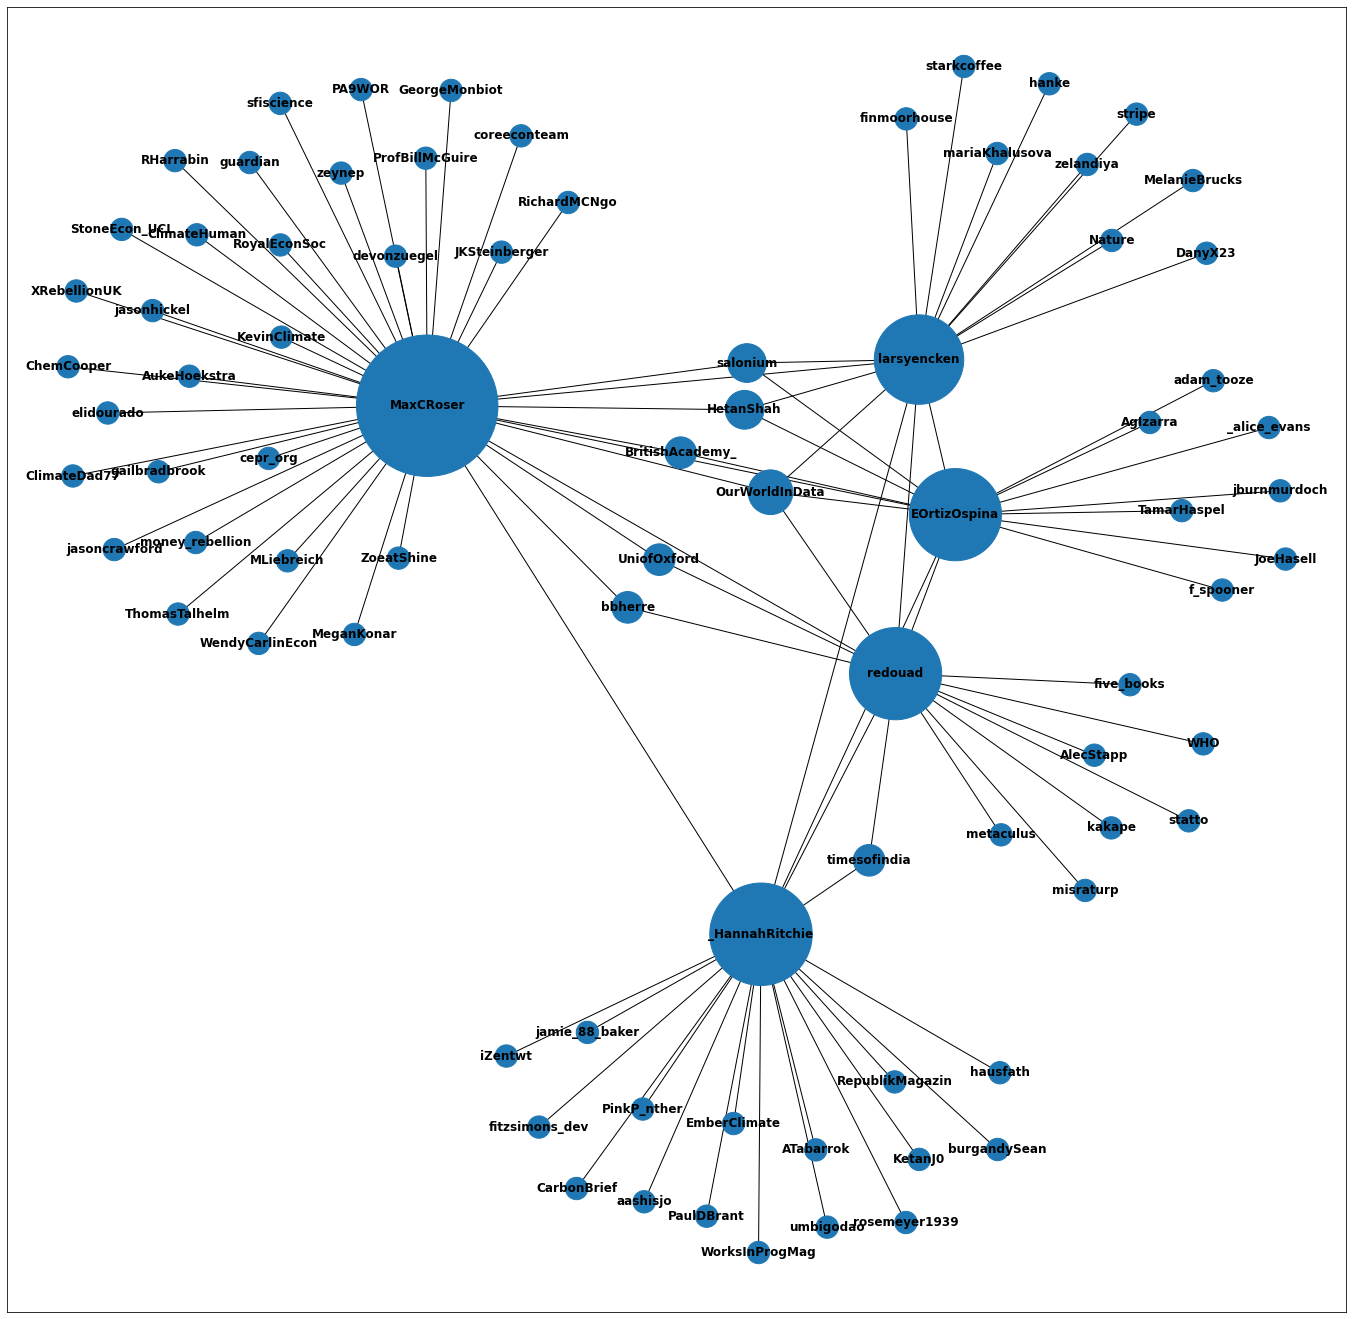

In [56]:
##MAKING GRAPH:
#Edge created by any interaction - retweet, reply, mention
#Directed - showing which is retweeted by the other
#use NetworkX - Graph.add_edge()
#use pandas, get tweet.user_id and tweet.screen_name

#get the degree for each node, then get the values
deg = nx.degree(graph)
degree_values = [v for k, v in deg]
node_size = [v * 500 for v in degree_values] #multiply by 100 to show properly 
position = nx.fruchterman_reingold_layout(graph)

plt.figure(3,figsize=(24,24))
nx.draw_networkx(graph, pos=position, 
                 with_labels=True, node_size=node_size,
        font_weight='bold')
